**Marta Amores**

#Práctica 2#


Debemos crear un modelo de Red de Neuronas Convolucionales, estas capas nos ayudarán al mejor reconocimiento de imágenes, para que nuestro modelo sea capaz de reconocer y clasificar imágenes. 
Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.  


Para entender mejor que son las redes convolucionales, sabemos que soy muy similares a las densamente conectadas (Dense), estas tienen pesos y sesgos y son capaces de aprender. 
La diferencia es que las redes convolucionales suponen que las entradas son imágenes, esto hace que podamos identificar diferentes propiedades de las imágenes, más allá de las Dense. 
Lo que realmente hacen las capas convolucionales es, antes de saber que es una boca o un ojo, saber identificar las líneas, texturas o formas, que sean similares a ellas. Después aprender la disposición de estos, es decir, una boca siempre va a estar debajo de la nariz, finalmente ya aprenderá lo que es una boca o un ojo. 



In [47]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


Comprobamos que nuestra versión es posterior a 2.0.0

Crgamos todas las librerías necesarías para poder entrenar nuestro modelo.

In [85]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
assert train_images.shape==(60000,28,28)
assert test_images.shape==(10000,28,28)
assert train_labels.shape==(60000,)
assert test_labels.shape==(10000,)

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
test_labels=test_labels.reshape((10000,1))
train_labels=train_labels.reshape((60000,1))



Comprobamos que los datos tienen la forma esperada.
Tanto las muestras como las etiquetas.

#Definición de los modelos

##Caso 1##

In [49]:
model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64,(5,5), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(10,'softmax'))


print('CASO 1 \n')

model1.summary()



CASO 1 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 10)      

EXPLICAR MODEL SUMMARY

Definimos modelo

In [50]:
model1.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics='accuracy')

ENTRENAMOS 5 EPOCAS

In [74]:
 historia1=model1.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 2s 4ms/step - loss: 0.4099 - accuracy: 0.8557 - val_loss: 0.4071 - val_accuracy: 0.8561
Epoch 2/5
480/480 [==============================] - 2s 4ms/step - loss: 0.4018 - accuracy: 0.8587 - val_loss: 0.4234 - val_accuracy: 0.8507
Epoch 3/5
480/480 [==============================] - 2s 4ms/step - loss: 0.3951 - accuracy: 0.8605 - val_loss: 0.4075 - val_accuracy: 0.8572
Epoch 4/5
480/480 [==============================] - 2s 5ms/step - loss: 0.3887 - accuracy: 0.8618 - val_loss: 0.4174 - val_accuracy: 0.8535
Epoch 5/5
480/480 [==============================] - 2s 5ms/step - loss: 0.3828 - accuracy: 0.8656 - val_loss: 0.3889 - val_accuracy: 0.8648


In [73]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [75]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

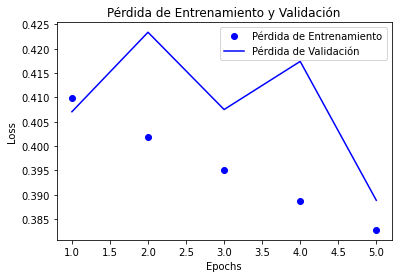

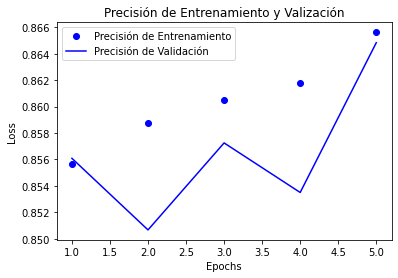

In [77]:
pinta_perdida_entrenamiento_validacion(historia1)
pinta_precision_entrenamiento_validacion(historia1)


#Caso 2

In [78]:
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128,(3,3), padding = 'same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(65, activation='relu'))
model2.add(Dense(10,'softmax'))

print('CASO 2 \n')

model2.summary()

CASO 2 

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 6272)              0         
                                                                 
 dense_18 (Dense)            (None, 65)     

In [79]:
model2.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics='accuracy')

In [80]:
 historia2=model2.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 6s 11ms/step - loss: 1.0970 - accuracy: 0.6217 - val_loss: 0.7975 - val_accuracy: 0.7398
Epoch 2/5
480/480 [==============================] - 4s 8ms/step - loss: 0.6890 - accuracy: 0.7466 - val_loss: 0.6791 - val_accuracy: 0.7402
Epoch 3/5
480/480 [==============================] - 3s 7ms/step - loss: 0.6067 - accuracy: 0.7796 - val_loss: 0.5690 - val_accuracy: 0.7947
Epoch 4/5
480/480 [==============================] - 3s 7ms/step - loss: 0.5557 - accuracy: 0.7980 - val_loss: 0.5713 - val_accuracy: 0.7792
Epoch 5/5
480/480 [==============================] - 3s 7ms/step - loss: 0.5170 - accuracy: 0.8141 - val_loss: 0.4966 - val_accuracy: 0.8227


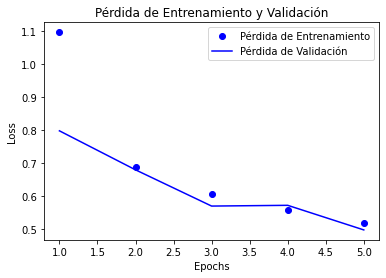

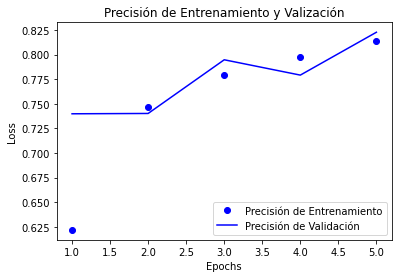

In [81]:
pinta_perdida_entrenamiento_validacion(historia2)
pinta_precision_entrenamiento_validacion(historia2)

#Caso 3

In [55]:
model3 = Sequential()
model3.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128,(3,3), padding = 'same', activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(65, activation='relu'))
model3.add(Dense(10,'softmax'))

print('CASO 3 \n')

model3.summary()

CASO 3 

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 6272)              0         
                                                                 
 dense_14 (Dense)            (None, 65)      

In [56]:
model3.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics='accuracy')

In [82]:
 historia3= model3.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 4s 9ms/step - loss: 0.1792 - accuracy: 0.9339 - val_loss: 0.1808 - val_accuracy: 0.9328
Epoch 2/5
480/480 [==============================] - 4s 8ms/step - loss: 0.1631 - accuracy: 0.9392 - val_loss: 0.1769 - val_accuracy: 0.9349
Epoch 3/5
480/480 [==============================] - 4s 8ms/step - loss: 0.1447 - accuracy: 0.9461 - val_loss: 0.2043 - val_accuracy: 0.9262
Epoch 4/5
480/480 [==============================] - 3s 7ms/step - loss: 0.1275 - accuracy: 0.9538 - val_loss: 0.1946 - val_accuracy: 0.9290
Epoch 5/5
480/480 [==============================] - 4s 8ms/step - loss: 0.1115 - accuracy: 0.9585 - val_loss: 0.2039 - val_accuracy: 0.9314


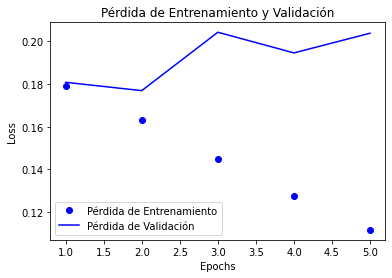

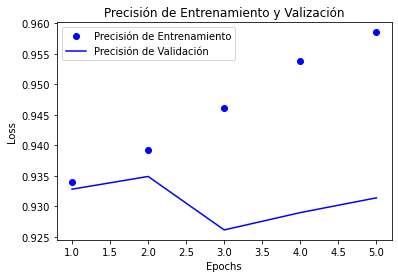

In [83]:
pinta_perdida_entrenamiento_validacion(historia3)
pinta_precision_entrenamiento_validacion(historia3)

#Caso 4



Variar el caso 1, en cambio de 5 épocas de entrenamiento, hacerlo con 25.

In [58]:
model_1 = Sequential()
model_1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64,(5,5), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Flatten())
model_1.add(Dense(10,'softmax'))


print('CASO 1 \n')

model_1.summary()


CASO 1 

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 10)     

In [59]:
model_1.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics='accuracy')

In [60]:
model_1.fit(train_images, train_labels,
          batch_size=100,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
600/600 [==============================] - 2s 3ms/step - loss: 1.2380 - accuracy: 0.5915
Epoch 2/25
600/600 [==============================] - 2s 3ms/step - loss: 0.6551 - accuracy: 0.7597
Epoch 3/25
600/600 [==============================] - 2s 3ms/step - loss: 0.5715 - accuracy: 0.7933
Epoch 4/25
600/600 [==============================] - 2s 3ms/step - loss: 0.5247 - accuracy: 0.8114
Epoch 5/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4916 - accuracy: 0.8246
Epoch 6/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4666 - accuracy: 0.8341
Epoch 7/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4469 - accuracy: 0.8426
Epoch 8/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4313 - accuracy: 0.8479
Epoch 9/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4182 - accuracy: 0.8529
Epoch 10/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4059 - accuracy: 0.8569

# Caso 5



In [61]:
model__1 = Sequential()
model__1.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
model__1.add(MaxPooling2D((2, 2)))
model__1.add(Conv2D(64,(5,5), activation='tanh'))
model__1.add(MaxPooling2D((2, 2)))
model__1.add(Flatten())
model__1.add(Dense(10,'softmax'))


print('CASO 1 \n')

model__1.summary()


CASO 1 

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 10)     

In [62]:
model__1.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics='accuracy')

In [63]:
 model__1.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 1.1399 - accuracy: 0.6413
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.6687 - accuracy: 0.7566
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5876 - accuracy: 0.7857
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5398 - accuracy: 0.8040
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5065 - accuracy: 0.8174


# Análisis de los resultados

In [64]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [68]:
predictions = model1.predict(test_images)
predictions2 = model2.predict(test_images)
predictions3 = model3.predict(test_images)
test_labels=test_labels.reshape(10000,)

313/313 [==============================] - 1s 2ms/step


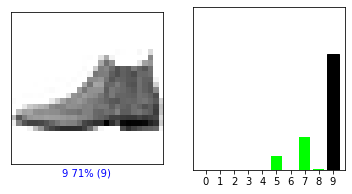

<Figure size 432x288 with 0 Axes>

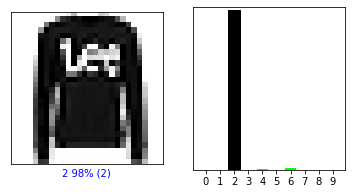

<Figure size 432x288 with 0 Axes>

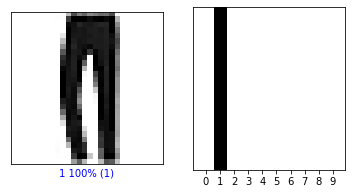

<Figure size 432x288 with 0 Axes>

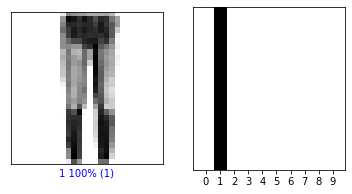

<Figure size 432x288 with 0 Axes>

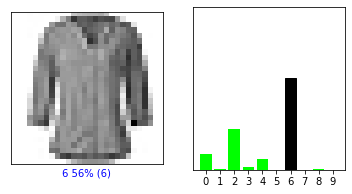

<Figure size 432x288 with 0 Axes>

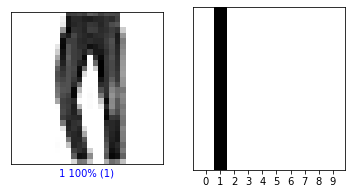

<Figure size 432x288 with 0 Axes>

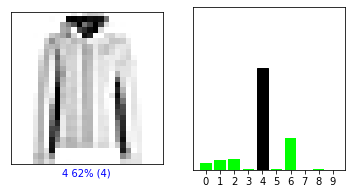

<Figure size 432x288 with 0 Axes>

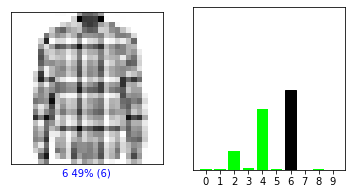

<Figure size 432x288 with 0 Axes>

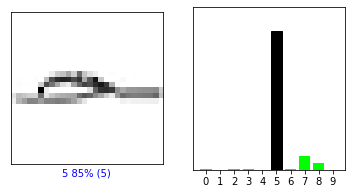

<Figure size 432x288 with 0 Axes>

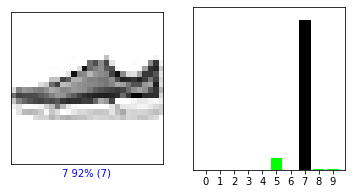

<Figure size 432x288 with 0 Axes>

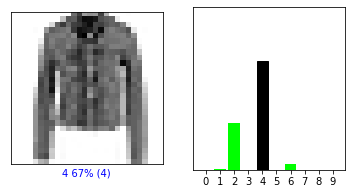

<Figure size 432x288 with 0 Axes>

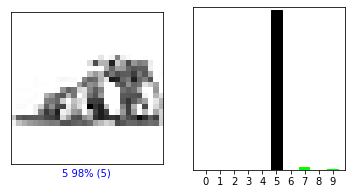

<Figure size 432x288 with 0 Axes>

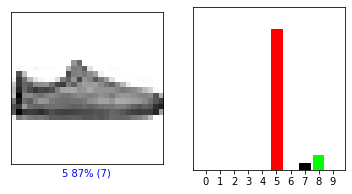

<Figure size 432x288 with 0 Axes>

In [69]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

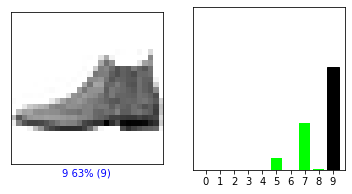

<Figure size 432x288 with 0 Axes>

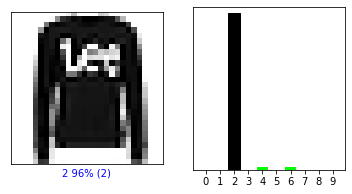

<Figure size 432x288 with 0 Axes>

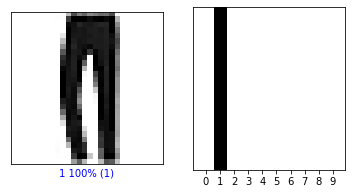

<Figure size 432x288 with 0 Axes>

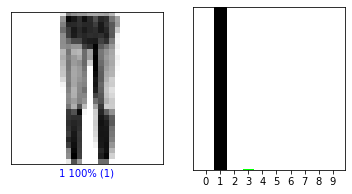

<Figure size 432x288 with 0 Axes>

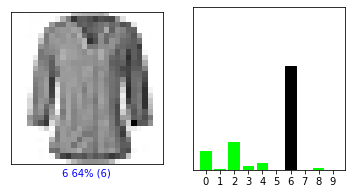

<Figure size 432x288 with 0 Axes>

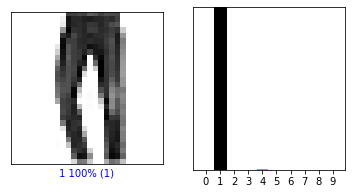

<Figure size 432x288 with 0 Axes>

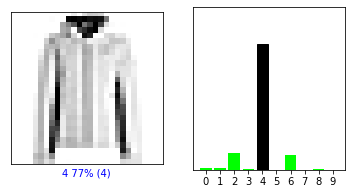

<Figure size 432x288 with 0 Axes>

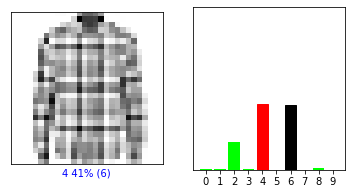

<Figure size 432x288 with 0 Axes>

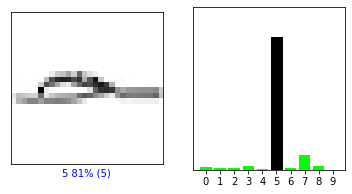

<Figure size 432x288 with 0 Axes>

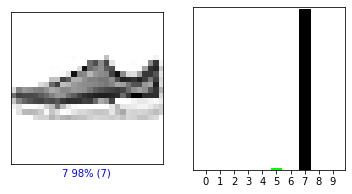

<Figure size 432x288 with 0 Axes>

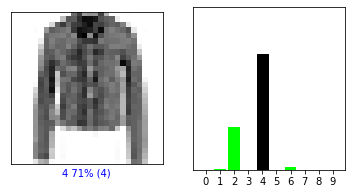

<Figure size 432x288 with 0 Axes>

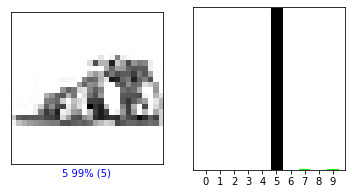

<Figure size 432x288 with 0 Axes>

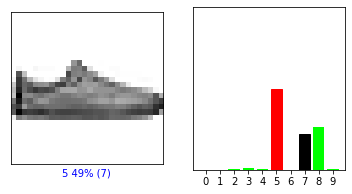

<Figure size 432x288 with 0 Axes>

In [70]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions2[i],  test_labels)
  plt.show()
  plt.clf()

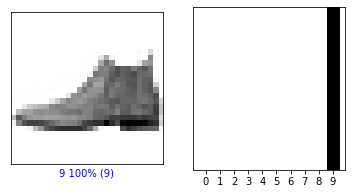

<Figure size 432x288 with 0 Axes>

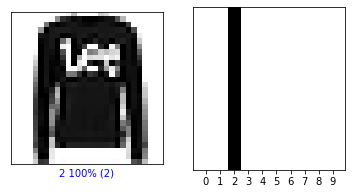

<Figure size 432x288 with 0 Axes>

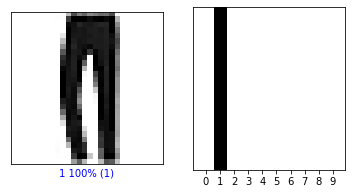

<Figure size 432x288 with 0 Axes>

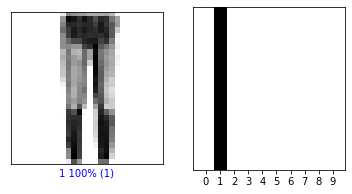

<Figure size 432x288 with 0 Axes>

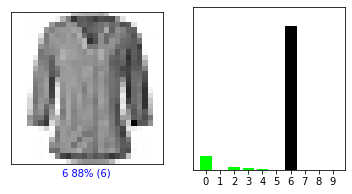

<Figure size 432x288 with 0 Axes>

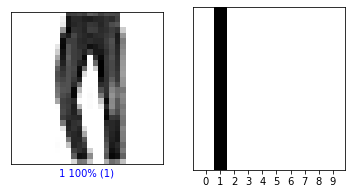

<Figure size 432x288 with 0 Axes>

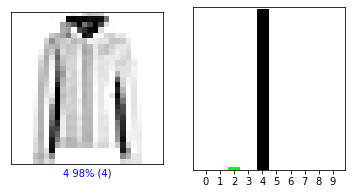

<Figure size 432x288 with 0 Axes>

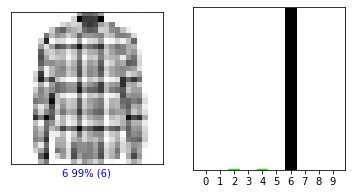

<Figure size 432x288 with 0 Axes>

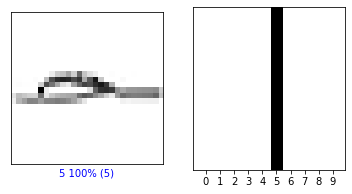

<Figure size 432x288 with 0 Axes>

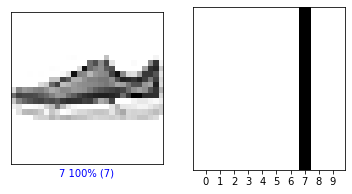

<Figure size 432x288 with 0 Axes>

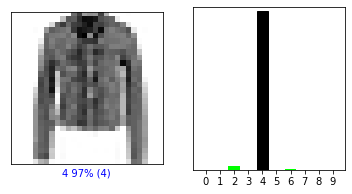

<Figure size 432x288 with 0 Axes>

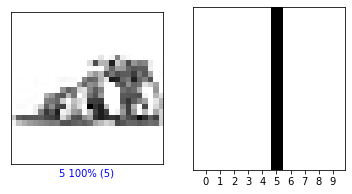

<Figure size 432x288 with 0 Axes>

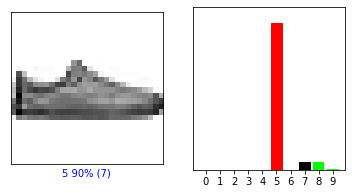

<Figure size 432x288 with 0 Axes>

In [71]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions3[i],  test_labels)
  plt.show()
  plt.clf()

# Modelo con los conceptos batch_normalization y dropout 

In [98]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(10,'softmax'))


print('CASO 1 \n')
model.summary()

CASO 1 

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_20 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 batch_normalization_21 (Bat  (None, 8, 8, 6

In [99]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5521 - accuracy: 0.8097
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3978 - accuracy: 0.8589
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3451 - accuracy: 0.8742
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3222 - accuracy: 0.8823
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2884 - accuracy: 0.8930


In [101]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [102]:
predictions = model.predict(test_images)

test_labels=test_labels.reshape(10000,)

313/313 [==============================] - 1s 2ms/step


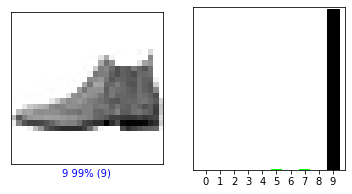

<Figure size 432x288 with 0 Axes>

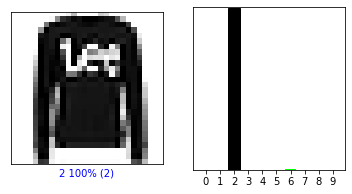

<Figure size 432x288 with 0 Axes>

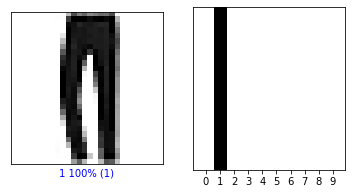

<Figure size 432x288 with 0 Axes>

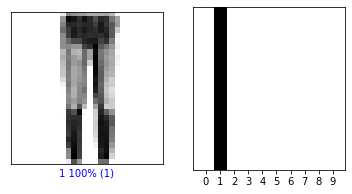

<Figure size 432x288 with 0 Axes>

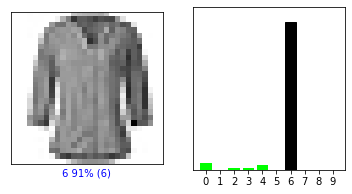

<Figure size 432x288 with 0 Axes>

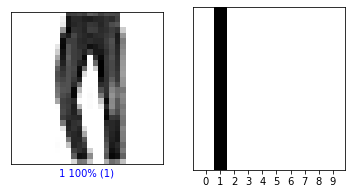

<Figure size 432x288 with 0 Axes>

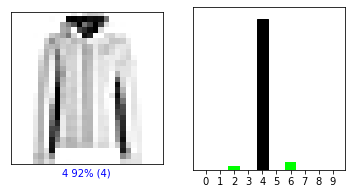

<Figure size 432x288 with 0 Axes>

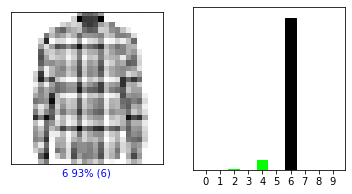

<Figure size 432x288 with 0 Axes>

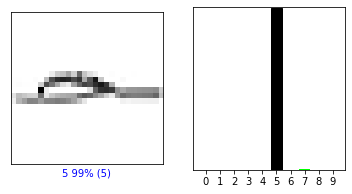

<Figure size 432x288 with 0 Axes>

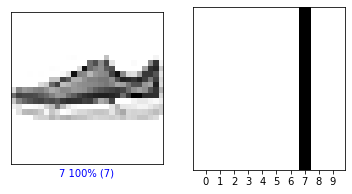

<Figure size 432x288 with 0 Axes>

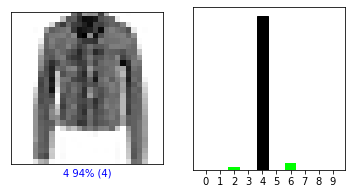

<Figure size 432x288 with 0 Axes>

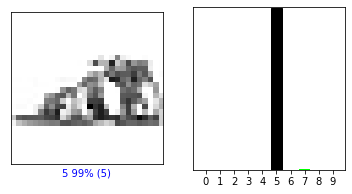

<Figure size 432x288 with 0 Axes>

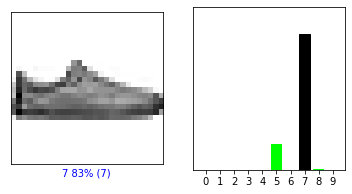

<Figure size 432x288 with 0 Axes>

In [103]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()